<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week4/WOA7015_Wk4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 4
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


## 1.0 Effect of weight and bias to sigmoid function
This is the code to generate the figure in slide 6

#### 1.1 Effect of weight on sigmoid function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# create sigmoid function
f = lambda x, w, b: 1/(1 + np.exp(-(w*x + b)))

x = np.arange(-10, 10, 0.01).reshape([-1, 1])

# effect of weight on sigmoid function
filenames = []
for i in np.arange(1, 5, 0.1):
  w = np.ones([1, 1]) * i * 0.5
  b = np.ones([1, 1]) * 0

  plt.plot(x, f(x, w, b))
  plt.title('w = %0.1f' % i)
  plt.grid()
  plt.savefig('w %0.1f.png' % i)
  plt.close()
  filenames.append('w %0.1f.png' % i)

# Build GIF
with imageio.get_writer('w_mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)



#### 1.1 Effect of bias on sigmoid function

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# create sigmoid function
f = lambda x, w, b: 1/(1 + np.exp(-(w*x + b)))

x = np.arange(-10, 10, 0.01).reshape([-1, 1])

# effect of bias on sigmoid function
filenames = []
for i in np.arange(1, 5, 0.1):
  w = np.ones([1, 1])
  b = np.ones([1, 1])* i

  plt.plot(x, f(x, w, b))
  plt.title('b = %0.1f' % i)
  plt.grid()
  plt.savefig('b %0.1f.png' % i)
  plt.close()
  filenames.append('b %0.1f.png' % i)

# Build GIF
with imageio.get_writer('b_mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


# 2.0 Logistic Regression

In this section, we will learn how to create train a Logistic Regression Model using pytorch. We will use MNIST image, as shown below. <br><br>

PyTorch (https://pytorch.org/) is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. 


<br>
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week4/MnistExamples.png" width="512"/>



In [6]:
# 2.1 import library
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [7]:
#2.2 Set the Hyper-parameters 
input_size = 28 * 28  # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [11]:
#2.3 Data loader
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()
----------------
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: ToTensor()

training data shape:  torch.Size([60000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, 'n = 47414 label = 5')

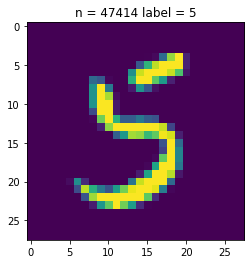

In [34]:
# 2.3.1 Check data 
print(train_dataset)
print('----------------')
print(test_dataset)
print()

import matplotlib.pyplot as plt
print('training data shape: ', train_dataset.data.shape)
n = np.random.randint(0, 60000)
plt.imshow(train_dataset.data[n])
plt.title(f'n = %d label = %d' % (n, train_dataset.train_labels[n].numpy()))


In [35]:
#2.4 Logistic regression model
model = nn.Linear(input_size, num_classes)


In [36]:
#2.5 Cross Entropy Loss 
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()   


In [37]:
#2.6 Optimizer Stochastic Gradient Descent 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [ ]:
#2.7 Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

In [39]:
#2.8 Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the model on the 10000 test images: 82.5 %


In [40]:
#2.9 Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## Exercise 1 (10%): Create custom loss function
In this section, you will need to create our own Cross Entropy loss function and compare with Pytorch's Cross Entropy loss. The objective of this exercise is to enable you to design your own loss in the future. 

Follow the steps below:
1. Import libraries - copy section 2.1
2. Set hyperparameter - copy section 2.2
3. Data loader - copy section 2.3
4. Initialize Logistic Regression - copy section 2.4
5. Create custom_CrossEntropyLoss class - copy the following code. Your task is to ***code the log_softmax equation in the log_softmax function.*** 

```
#  Custom Loss - Cross Entropy Loss
class custom_CrossEntropyLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(custom_CrossEntropyLoss, self).__init__()
 
    def forward(self, inputs, targets, smooth=1):      
        num_examples = targets.shape[0]
        batch_size = inputs.shape[0]
        softmax_outputs = self.log_softmax(inputs)
        outputs = softmax_outputs[range(batch_size), targets]        
        return -torch.sum(outputs)/num_examples

    @staticmethod
    def log_softmax(x):
      return ### put the log_softmax function here ### 
```

6. Initialize custom_CrossEntropyLoss loss as criterion - copy section 2.5. Replace *nn.CrossEntropyLoss* with *custom_CrossEntropyLoss*
7. Train the model, evaluate it on your testing data. Save your model. 
8. Compare the loss computed from torch and our custom loss.  


 5% will be  given if step 1 - 4 are done correctly <br>
 3% will be  given if step 5-7 is done correctly <br>
 2% will be given if your custom loss and pytorch loss is near zero. 

In [ ]:
# your code here

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 